In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel("/content/Classeur 4.xlsx")

In [9]:
df.columns

Index(['Type de Circonscription', 'Région', 'Préfecture ou province',
       'Nom de la Circonscription', 'Prénom et Nom', 'Appartenance politique',
       'Genre', 'Groupe ou groupement parlementaire'],
      dtype='object')

In [10]:
df

,Type de Circonscription,Région,Préfecture ou province,Nom de la Circonscription,Prénom et Nom,Appartenance politique,Genre,Groupe ou groupement parlementaire
0,locale,Région de Tanger Tétouan Hoceima,Tanger-Assilah,Tanger-Assilah,Adil Dfouf,Parti Authenticité et Modernité,Homme,Groupe Authenticité et Modernité
1,locale,Région de Tanger Tétouan Hoceima,Tanger-Assilah,Tanger-Assilah,Mohamed Hmami,Parti de l'Istiqlal,Homme,Groupe istiqlalien de l'unité et de l'égalitar...
2,locale,Région de Tanger Tétouan Hoceima,Tanger-Assilah,Tanger-Assilah,Houssain Ben Taieb,Parti du Rassemblement National des Indépendants,Homme,Groupe du Rassemblement National des Indépendants
3,locale,Région de Tanger Tétouan Hoceima,Tanger-Assilah,Tanger-Assilah,Mohamed Zemmouri,Parti de l'Union Constitutionnelle,Homme,Groupe Constitutionnel Démocratique et Social
4,locale,Région de Tanger Tétouan Hoceima,Tanger-Assilah,Tanger-Assilah,Abdelkader Taher,Union Socialiste des Forces Populaires,Homme,Groupe Socialiste
...,...,...,...,...,...,...,...,...
389,régionale,NaN,NaN,Laâyoune-Sakia El Hamra,Laila Dahi,Parti du Rassemblement National des Indépendants,Femme,Groupe du Rassemblement National des Indépendants
390,régionale,NaN,NaN,Laâyoune-Sakia El Hamra,Hayat Laaraych,Union Socialiste des Forces Populaires,Femme,Groupe Socialiste
391,régionale,NaN,NaN,Dakhla-Oued Ed-Dahab,Khadija Bougarne,Parti de l'Istiqlal,Femme,Groupe istiqlalien de l'unité et de l'égalitar...
392,régionale,NaN,NaN,Dakhla-Oued Ed-Dahab,Rifaa Maelainine,Parti du Progrès et du Socialisme,Femme,Groupe du Progrès et du Socialisme


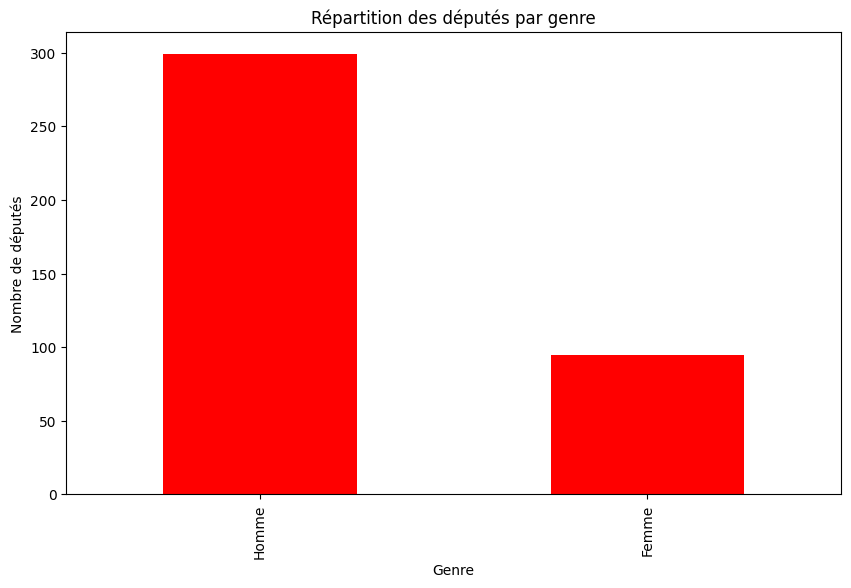

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Supposons que df est notre DataFrame

# 1. Analyse de la répartition par genre
genre_count = df['Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_count.plot(kind='bar',color="red")
plt.title('Répartition des députés par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de députés')
plt.show()

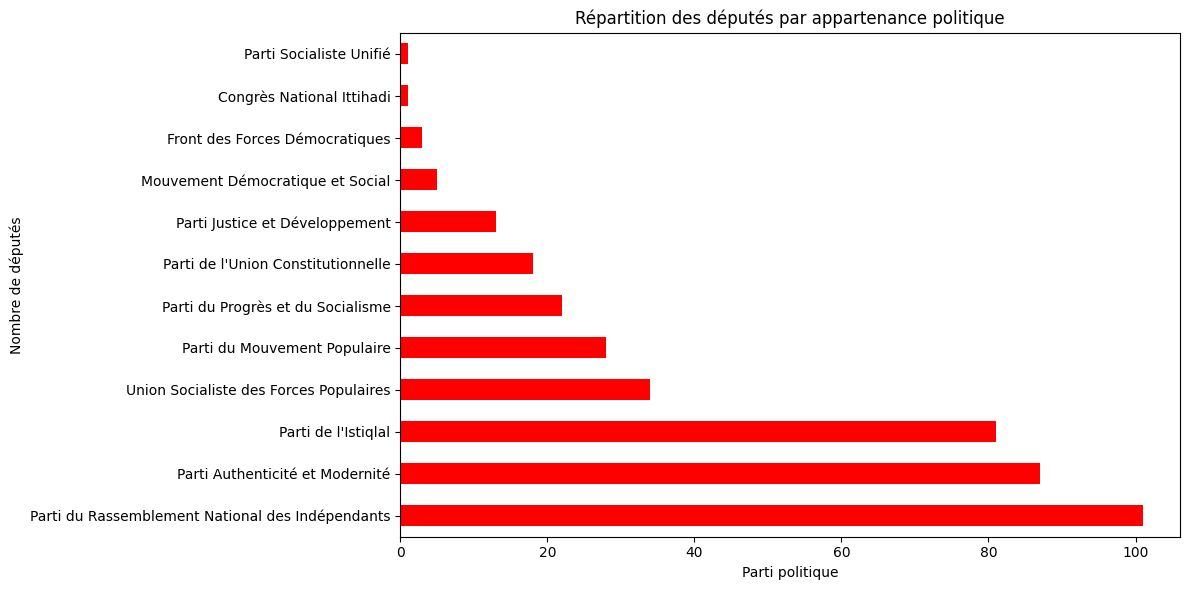

In [19]:
parti_count = df['Appartenance politique'].value_counts()
plt.figure(figsize=(12, 6))
parti_count.plot(kind='barh',color="red")
plt.title('Répartition des députés par appartenance politique')
plt.xlabel('Parti politique')
plt.ylabel('Nombre de députés')
plt.tight_layout()
plt.show()

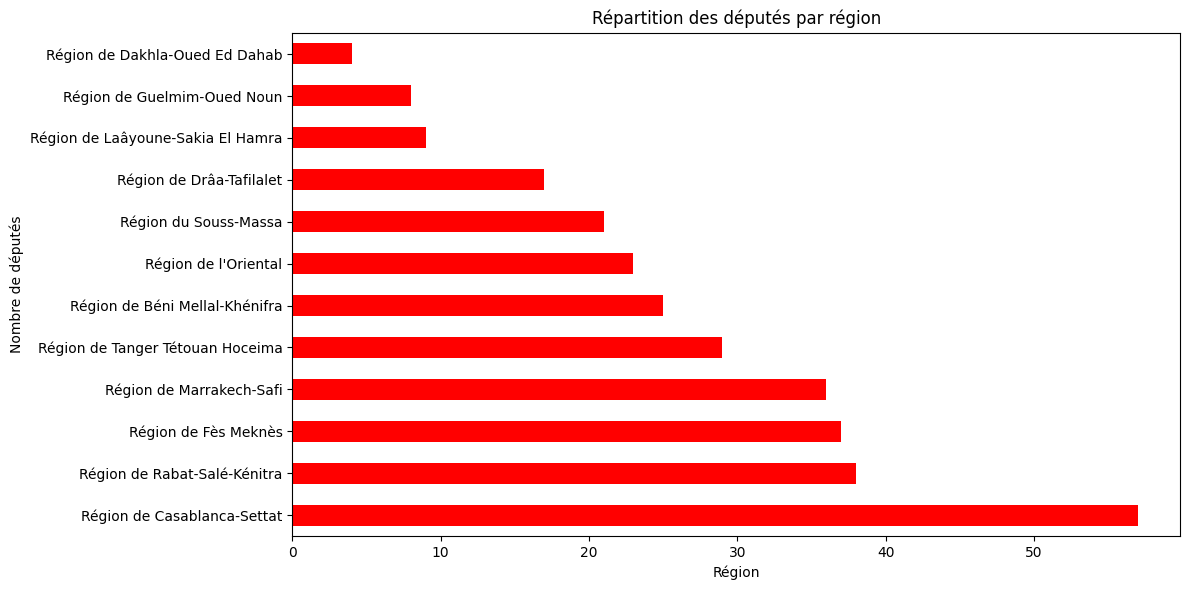

In [21]:
region_count = df['Région'].value_counts()
plt.figure(figsize=(12, 6))
region_count.plot(kind='barh',color="red")
plt.title('Répartition des députés par région')
plt.xlabel('Région')
plt.ylabel('Nombre de députés')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

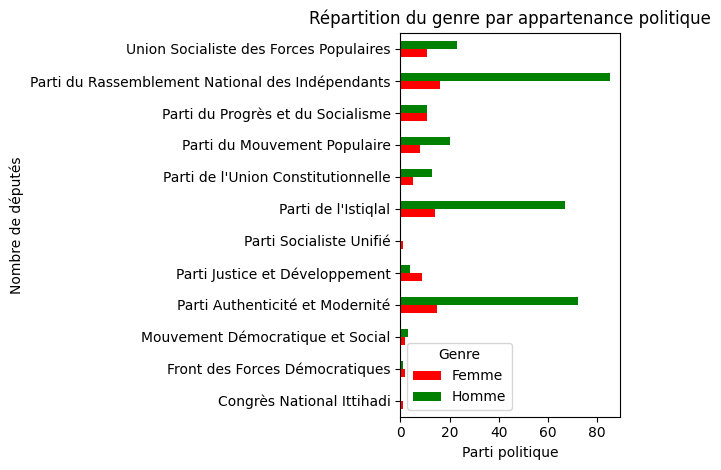

In [27]:
cross_tab = pd.crosstab(df['Appartenance politique'], df['Genre'])
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='barh',color=["red","green"])
plt.title('Répartition du genre par appartenance politique')
plt.xlabel('Parti politique')
plt.ylabel('Nombre de députés')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

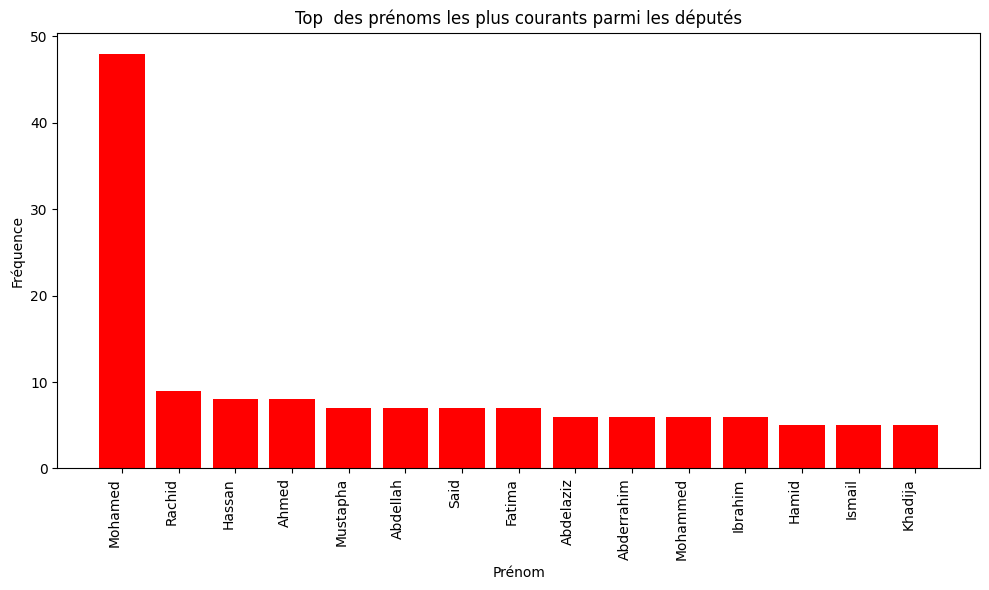

In [36]:
def get_first_word(name):
    return name.split()[0]

first_names = df['Prénom et Nom'].apply(get_first_word)
name_diversity = Counter(first_names)
top_10_names = dict(name_diversity.most_common(15))

plt.figure(figsize=(10, 6))
plt.bar(top_10_names.keys(), top_10_names.values(),color="red")
plt.title('Top  des prénoms les plus courants parmi les députés')
plt.xlabel('Prénom')
plt.ylabel('Fréquence')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

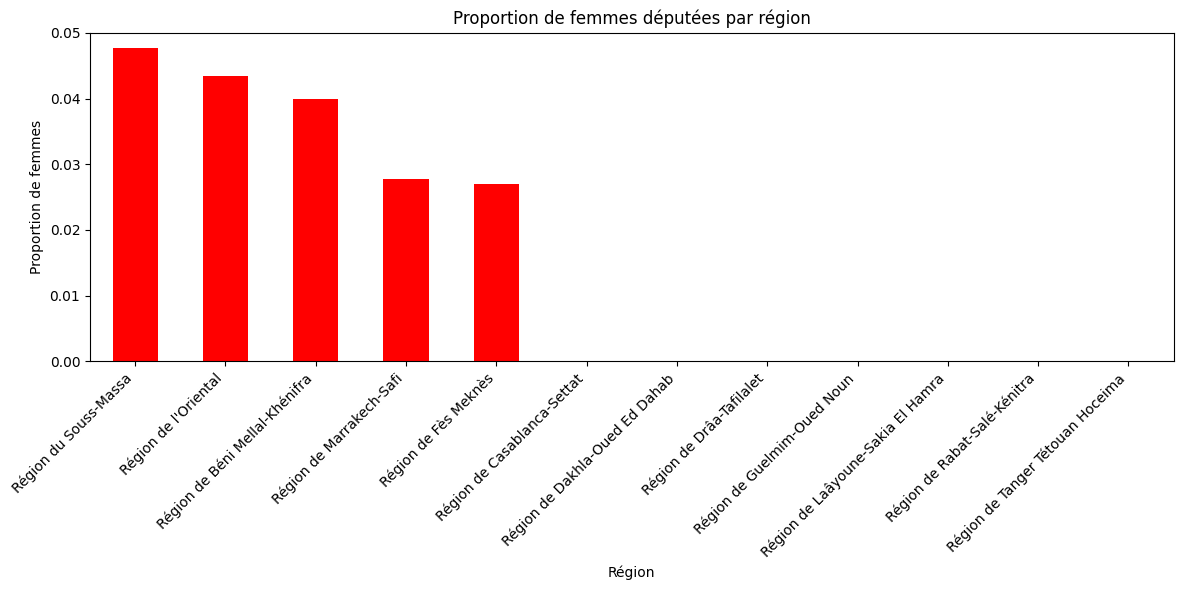

In [38]:
female_ratio = df[df['Genre'] == 'Femme'].groupby('Région').size() / df.groupby('Région').size()
female_ratio = female_ratio.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
female_ratio.plot(kind='bar',color="red")
plt.title('Proportion de femmes députées par région')
plt.xlabel('Région')
plt.ylabel('Proportion de femmes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

In [42]:
import networkx as nx

G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['Appartenance politique'], row['Groupe ou groupement parlementaire'])

pos = nx.spring_layout(G)
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(x=node_x, y=node_y, mode='markers', hoverinfo='text',
                        marker=dict(showscale=True, colorscale='YlGnBu', size=10))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f'{adjacencies[0]}: {len(adjacencies[1])} connexions')

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title='Réseau des groupes parlementaires et appartenances politiques',
                                 showlegend=False, hovermode='closest',
                                 margin=dict(b=20,l=5,r=5,t=40)))
fig.show()

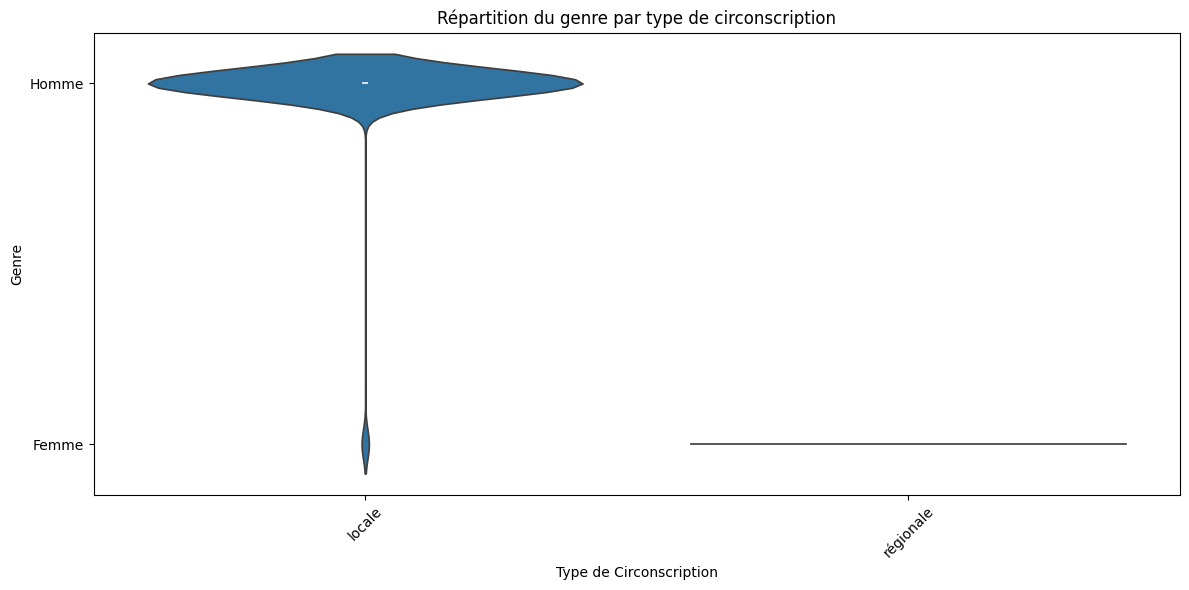

In [43]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Type de Circonscription', y='Genre', data=df)
plt.title('Répartition du genre par type de circonscription')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
region_party_gender = df.groupby(['Région', 'Appartenance politique', 'Genre']).size().reset_index(name='count')

fig = px.scatter(region_party_gender,
                 x='Région',
                 y='Appartenance politique',
                 size='count',
                 color='Genre',
                 hover_name='Région',
                 size_max=60)

fig.update_layout(title='Représentation par genre, région et appartenance politique',
                  xaxis_title='Région',
                  yaxis_title='Appartenance politique')
fig.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib_venn import venn3
from scipy.stats import chi2_contingency

# Supposons que df est notre DataFrame

# 1. Graphique en radar pour comparer la composition des groupes parlementaires
def radar_chart(df, groups):
    categories = df['Appartenance politique'].unique()
    fig = go.Figure()
    for group in groups:
        group_data = df[df['Groupe ou groupement parlementaire'] == group]
        values = [group_data[group_data['Appartenance politique'] == cat].shape[0] for cat in categories]
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill='toself',
            name=group
        ))
    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True)),
        showlegend=True,
        title='Composition des groupes parlementaires par appartenance politique'
    )
    fig.show()

In [46]:
top_groups = df['Groupe ou groupement parlementaire'].value_counts().nlargest(5).index
radar_chart(df, top_groups)

In [47]:
from plotly.subplots import make_subplots

def sankey_diagram(df):
    region_ids = {region: idx for idx, region in enumerate(df['Région'].unique())}
    type_ids = {type_: idx + len(region_ids) for idx, type_ in enumerate(df['Type de Circonscription'].unique())}
    genre_ids = {genre: idx + len(region_ids) + len(type_ids) for idx, genre in enumerate(df['Genre'].unique())}

    source = ([region_ids[region] for region in df['Région']] +
              [type_ids[type_] for type_ in df['Type de Circonscription']])
    target = ([type_ids[type_] for type_ in df['Type de Circonscription']] +
              [genre_ids[genre] for genre in df['Genre']])
    value = [1] * len(df) * 2  # Each deputy counts as 1 in each link

    node_labels = list(region_ids.keys()) + list(type_ids.keys()) + list(genre_ids.keys())
    node_colors = ['blue'] * len(region_ids) + ['green'] * len(type_ids) + ['red'] * len(genre_ids)

    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(color = "black", width = 0.5),
          label = node_labels,
          color = node_colors
        ),
        link = dict(
          source = source,
          target = target,
          value = value
    ))])

    fig.update_layout(title_text="Flux entre Régions, Types de Circonscription et Genres", font_size=10)
    fig.show()

sankey_diagram(df)

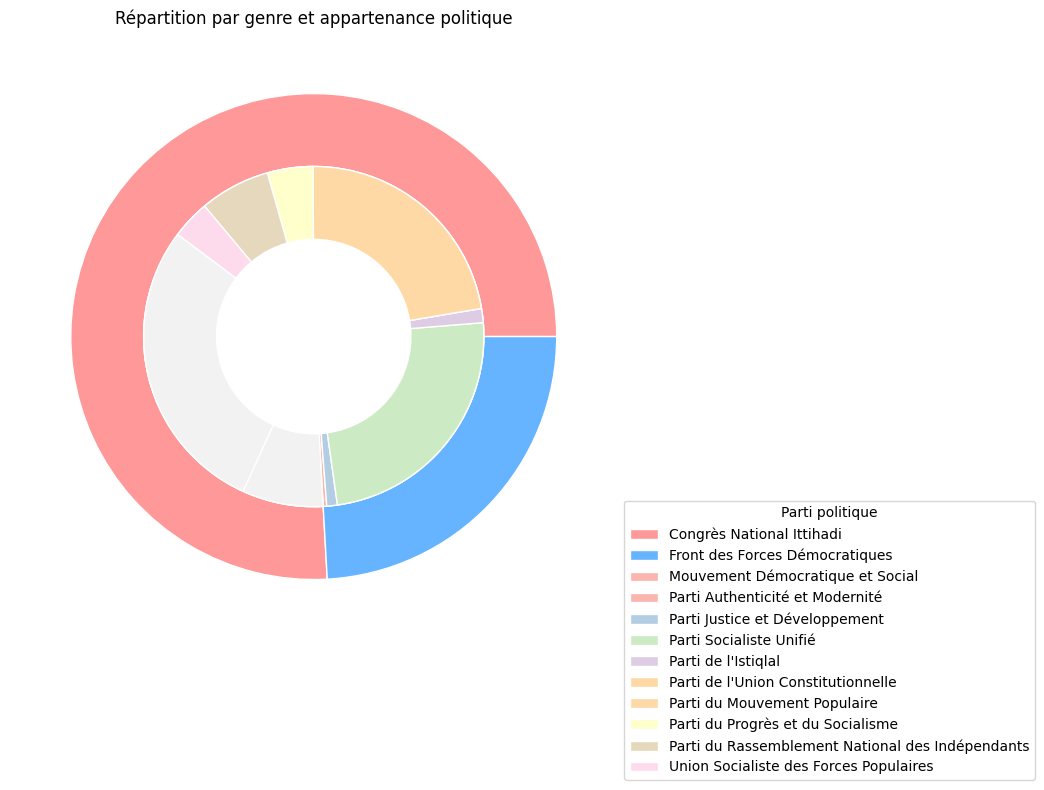

In [50]:
def nested_pie_chart(df):
    gender_counts = df['Genre'].value_counts()
    party_counts = df.groupby(['Genre', 'Appartenance politique']).size().unstack(fill_value=0)

    fig, ax = plt.subplots(figsize=(12, 8))

    inner_colors = ['#ff9999', '#66b3ff']
    outer_colors = plt.cm.Pastel1(np.linspace(0, 1, len(party_counts.columns)))

    wedges, _ = ax.pie(gender_counts, radius=1, colors=inner_colors,
                       wedgeprops=dict(width=0.3, edgecolor='white'))

    for i, (gender, row) in enumerate(party_counts.iterrows()):
        ax.pie(row, radius=0.7, colors=outer_colors,
               wedgeprops=dict(width=0.3, edgecolor='white'),
               startangle=wedges[i].theta1)

    ax.set(aspect="equal", title='Répartition par genre et appartenance politique')
    ax.legend(wedges, gender_counts.index, title="Genre", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.legend(party_counts.columns, title="Parti politique", loc="center left", bbox_to_anchor=(1, 0, 0.5, 0))
    plt.tight_layout()
    plt.show()

nested_pie_chart(df)

/usr/local/lib/python3.10/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning:

Bad circle positioning



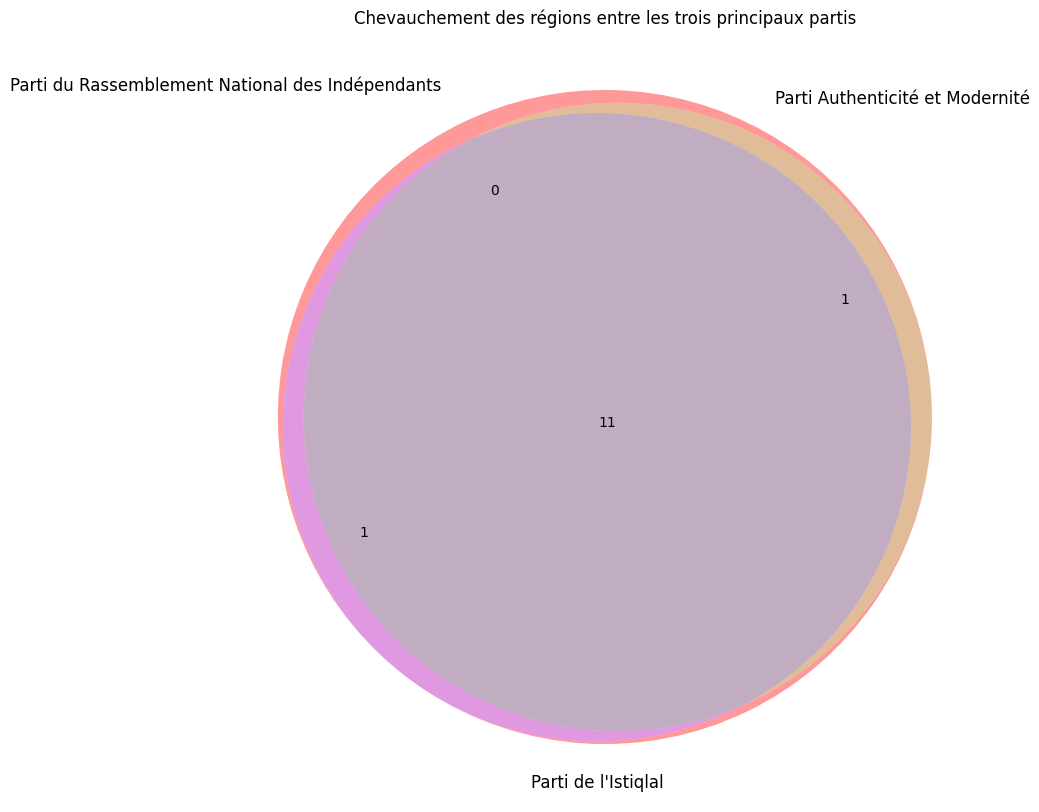

In [51]:
def venn_diagram(df):
    top_3_parties = df['Appartenance politique'].value_counts().nlargest(3).index
    sets = [set(df[df['Appartenance politique'] == party]['Région']) for party in top_3_parties]

    plt.figure(figsize=(10, 10))
    venn3(sets, set_labels=top_3_parties)
    plt.title("Chevauchement des régions entre les trois principaux partis")
    plt.show()

venn_diagram(df)

Résultat du test du chi-carré :
Statistique du chi-carré : 42.25638876002759
Valeur p : 1.462273729254703e-05


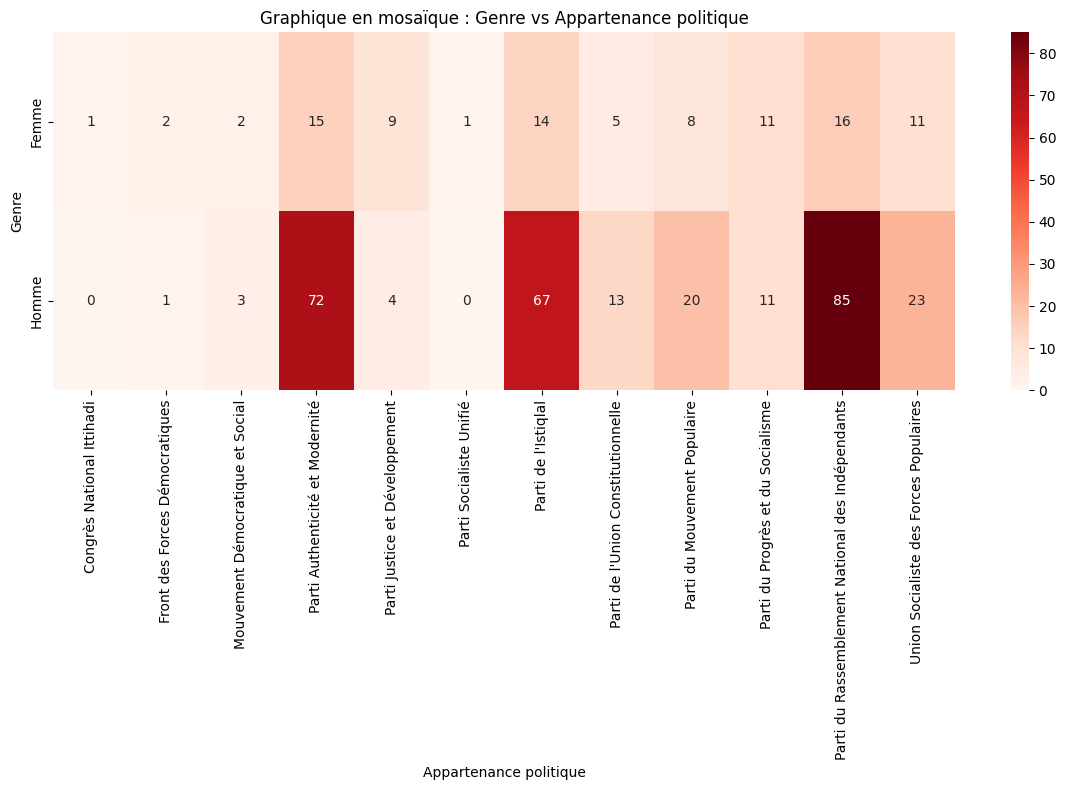

In [53]:
def chi_square_test_and_mosaic(df):
    contingency_table = pd.crosstab(df['Genre'], df['Appartenance politique'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Résultat du test du chi-carré :")
    print(f"Statistique du chi-carré : {chi2}")
    print(f"Valeur p : {p_value}")

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Reds', ax=ax)
    plt.title('Graphique en mosaïque : Genre vs Appartenance politique')
    plt.tight_layout()
    plt.show()

chi_square_test_and_mosaic(df)

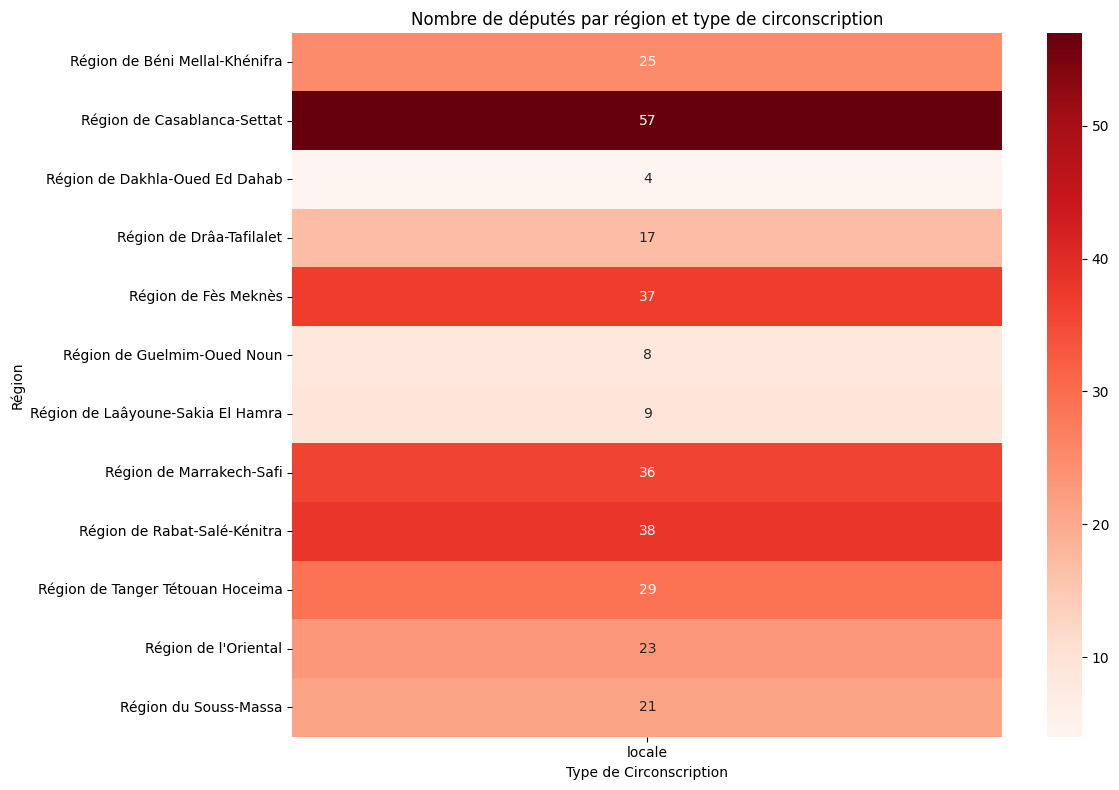

In [56]:
def heatmap_deputies(df):
    heatmap_data = df.groupby(['Région', 'Type de Circonscription']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds')
    plt.title('Nombre de députés par région et type de circonscription')
    plt.tight_layout()
    plt.show()

heatmap_deputies(df)

In [58]:
def polar_bar_chart(df):
    gender_party = pd.crosstab(df['Appartenance politique'], df['Genre'])
    gender_party_pct = gender_party.div(gender_party.sum(axis=1), axis=0)

    fig = go.Figure()

    for gender in gender_party_pct.columns:
        fig.add_trace(go.Barpolar(
            r=gender_party_pct[gender],
            theta=gender_party_pct.index,
            name=gender
        ))

    fig.update_layout(
        title='Répartition des genres par parti politique',
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )),
        showlegend=True
    )
    fig.show()

polar_bar_chart(df)

In [59]:
def bubble_chart(df):
    bubble_data = df.groupby(['Type de Circonscription', 'Genre']).size().reset_index(name='count')
    bubble_data['Pourcentage'] = bubble_data.groupby('Type de Circonscription')['count'].transform(lambda x: x / x.sum() * 100)

    fig = px.scatter(bubble_data, x='Type de Circonscription', y='count', size='Pourcentage', color='Genre',
                     hover_name='Type de Circonscription', size_max=60,
                     title='Relation entre le nombre de députés, le genre et le type de circonscription')
    fig.show()

bubble_chart(df)

In [60]:
def alluvial_diagram(df):
    from plotly.subplots import make_subplots

    # Créer les liens
    source = (df['Région'].astype('category').cat.codes +
              df['Appartenance politique'].astype('category').cat.codes)
    target = (df['Appartenance politique'].astype('category').cat.codes +
              df['Groupe ou groupement parlementaire'].astype('category').cat.codes +
              len(df['Région'].unique()))
    value = [1] * len(df)

    # Créer les nœuds
    label = (list(df['Région'].unique()) +
             list(df['Appartenance politique'].unique()) +
             list(df['Groupe ou groupement parlementaire'].unique()))
    color = (['blue'] * len(df['Région'].unique()) +
             ['green'] * len(df['Appartenance politique'].unique()) +
             ['red'] * len(df['Groupe ou groupement parlementaire'].unique()))

    # Créer le diagramme
    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(color = "black", width = 0.5),
          label = label,
          color = color
        ),
        link = dict(
          source = source,
          target = target,
          value = value
    ))])

    fig.update_layout(title_text="Flux entre Région, Appartenance politique et Groupe parlementaire", font_size=10)
    fig.show()

alluvial_diagram(df)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Supposons que df est notre DataFrame

# 1. Graphique en coordonnées parallèles
def parallel_coordinates_plot(df):
    # Sélectionner quelques colonnes pour la visualisation
    columns_to_plot = ['Région', 'Type de Circonscription', 'Appartenance politique', 'Genre']

    # Créer un DataFrame avec des valeurs numériques pour les colonnes catégorielles
    plot_df = pd.DataFrame()
    for col in columns_to_plot:
        plot_df[col] = pd.Categorical(df[col]).codes

    fig = px.parallel_coordinates(plot_df, color='Appartenance politique',
                                  labels={col: col for col in plot_df.columns},
                                  title='Caractéristiques des députés en coordonnées parallèles')
    fig.show()

parallel_coordinates_plot(df)


In [63]:
def region_radar_chart(df):
    # Sélectionner les 5 régions avec le plus de députés
    top_regions = df['Région'].value_counts().nlargest(5).index

    # Calculer les proportions pour chaque caractéristique
    characteristics = ['Genre', 'Type de Circonscription', 'Appartenance politique']
    region_data = {}

    for region in top_regions:
        region_df = df[df['Région'] == region]
        region_data[region] = []
        for char in characteristics:
            proportions = region_df[char].value_counts(normalize=True)
            region_data[region].extend(proportions.values[:3])  # Prendre les 3 premières catégories

    # Créer le graphique
    categories = [f"{char}_{i}" for char in characteristics for i in range(1, 4)]
    fig = go.Figure()

    for region in region_data:
        fig.add_trace(go.Scatterpolar(
            r=region_data[region],
            theta=categories,
            fill='toself',
            name=region
        ))

    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True)),
        showlegend=True,
        title='Comparaison des caractéristiques des députés par région'
    )
    fig.show()

region_radar_chart(df)

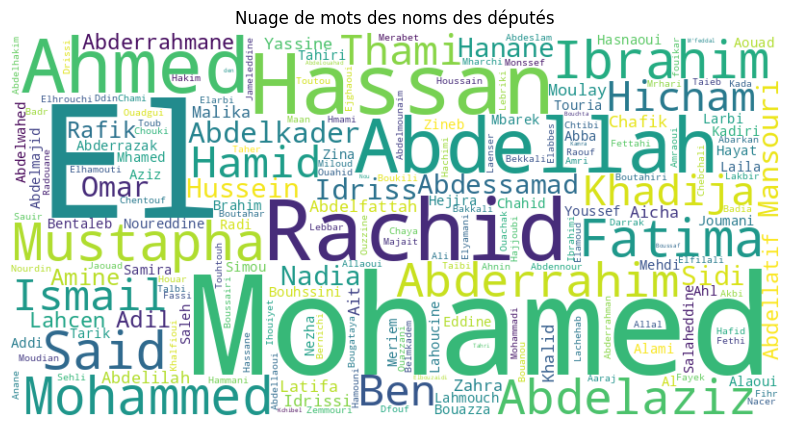

In [64]:
def name_wordcloud(df):
    text = ' '.join(df['Prénom et Nom'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuage de mots des noms des députés')
    plt.show()

name_wordcloud(df)

In [65]:
def donut_chart(df):
    type_counts = df['Type de Circonscription'].value_counts()

    fig = go.Figure(data=[go.Pie(labels=type_counts.index, values=type_counts.values, hole=.3)])
    fig.update_layout(title_text="Répartition des types de circonscription")
    fig.show()

donut_chart(df)

In [66]:
def tsne_visualization(df):
    # Préparer les données
    features = ['Région', 'Type de Circonscription', 'Appartenance politique', 'Genre']
    X = pd.get_dummies(df[features])

    # Appliquer t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Créer un DataFrame pour la visualisation
    tsne_df = pd.DataFrame(X_tsne, columns=['x', 'y'])
    tsne_df['Appartenance politique'] = df['Appartenance politique']
    tsne_df['Genre'] = df['Genre']

    # Créer le graphique
    fig = px.scatter(tsne_df, x='x', y='y', color='Appartenance politique', symbol='Genre',
                     title='Visualisation t-SNE des similitudes entre députés')
    fig.show()

tsne_visualization(df)